# Traing Goal

* quadratic weighted kappa score 를 통하여 정확도를 평가하는 알고리즘 생성

* ### quadratic weighted kappa
$$ k = 1-\dfrac{{\sum}_{i,i} w_{i,j} O_{i,j}}{{\sum}_{i,i} w_{i,j} E_{i,j}} $$

# Modeling
* Classification
* Regression

In [75]:
import numpy as np
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn import pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import auc

import joblib
from joblib import dump, load

pd.options.display.max_columns = 400
pd.options.display.max_rows = 200
pd.options.display.max_colwidth = 600
pd.options.display.precision = 10

In [76]:
df_train = pd.read_excel("./__data/excel/train.xlsx").fillna("")
df_test = pd.read_excel("./__data/excel/test.xlsx").fillna("")

In [77]:
all_train_X = joblib.load('all_train_X.pkl')
all_test_X = joblib.load('all_test_X.pkl')
tit_train_X = joblib.load('tit_train_X.pkl')
tit_test_X = joblib.load('tit_test_X.pkl')
y = joblib.load('y.pkl')

==================== Relevance Distribution ====================
Relevance 1 : 7.62 %
Relevance 2 : 14.53 %
Relevance 3 : 17.1 %
Relevance 4 : 60.75 %


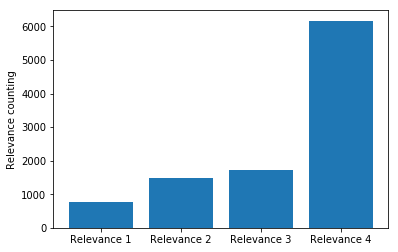

In [78]:
print('='*20,'Relevance Distribution','='*20)
relev_1 = (df_train['median_relevance'] == 1).value_counts()
print("Relevance 1 :",round(relev_1[True]/relev_1.sum()*100, 2)   ,"%")

relev_2 = (df_train['median_relevance'] == 2).value_counts()
print("Relevance 2 :" , round(relev_2[True]/relev_2.sum()*100, 2)  ,"%")

relev_3 = (df_train['median_relevance'] == 3).value_counts()
print("Relevance 3 :" , round(relev_3[True]/relev_3.sum()*100, 2)  ,"%")

relev_4 = (df_train['median_relevance'] == 4).value_counts()
print("Relevance 4 :" , round(relev_4[True]/relev_4.sum()*100, 2)  ,"%")

only_1 = int(relev_1[True])
only_2 = int(relev_2[True])
only_3 = int(relev_3[True])
only_4 = int(relev_4[True])

y_label = [only_1, only_2, only_3, only_4]
x = [1, 2, 3, 4]
plt.bar(x, y_label)
plt.xticks(x, ('Relevance 1', 'Relevance 2', 'Relevance 3', 'Relevance 4'))
plt.ylabel('Relevance counting')
plt.show()

In [11]:
cv = KFold(5)

# Modeling (1) Classification

### Algorithms
1. KSVM
2. XGBClassifier

### (1) KSVM

In [96]:
%%time
poly_svc_all = SVC(kernel="poly", degree=2, gamma=1, coef0=0).fit(all_train_X, y)
poly_svc_tit = SVC(kernel="poly", degree=2, gamma=1, coef0=0).fit(tit_train_X, y)

Wall time: 4min 53s


In [97]:
print("use all :", cross_val_score(poly_svc_all, all_train_X, y, cv=cv))
print("use title :", cross_val_score(poly_svc_tit, tit_train_X, y, cv=cv))

use all : [ 0.65206693  0.65797244  0.6474643   0.6553422   0.65288035]
use title : [ 0.6628937   0.66830709  0.65435746  0.66962088  0.66174298]


In [98]:
poly_all_pred = poly_svc_all.predict(all_test_X)
poly_tit_pred = poly_svc_tit.predict(tit_test_X)

In [99]:
poly_all_answer = pd.concat([pd.DataFrame(df_test['id'], columns=['id']), pd.DataFrame(poly_all_pred, columns=['prediction'])], axis=1)
poly_all_answer.to_csv('./poly_all_answer.csv', index=False)

In [100]:
poly_tit_answer = pd.concat([pd.DataFrame(df_test['id'], columns=['id']), pd.DataFrame(poly_tit_pred, columns=['prediction'])], axis=1)
poly_tit_answer.to_csv('./poly_tit_answer.csv', index=False)

* Submisiion
  - use all : 0.45676
  - use title : 0.50353

### (2) XGBClassifier

#### max_depth=200 (Best parameter)

In [101]:
%%time
xgb_clf_all = XGBClassifier(max_depth=200).fit(all_train_X, y)
xgb_clf_tit = XGBClassifier(max_depth=200).fit(tit_train_X, y)

Wall time: 4h 12min 20s


In [102]:
print("use all :", cross_val_score(xgb_clf_all, all_train_X, y, cv=cv))
print("use title :", cross_val_score(xgb_clf_tit, tit_train_X, y, cv=cv))

use all : [ 0.64812992  0.64173228  0.63909404  0.6459872   0.64500246]
use title : [ 0.65009843  0.64665354  0.62973904  0.64155588  0.64303299]


In [104]:
xgb_clf_all_pred = xgb_clf_all.predict(all_test_X)
xgb_clf_tit_pred = xgb_clf_tit.predict(tit_test_X)

In [105]:
xgb_clf_all_answer = pd.concat([pd.DataFrame(df_test['id'], columns=['id']), pd.DataFrame(xgb_clf_all_pred, columns=['prediction'])], axis=1)
xgb_clf_all_answer.to_csv('./xgb_clf_all_answer.csv', index=False)

In [106]:
xgb_clf_tit_answer = pd.concat([pd.DataFrame(df_test['id'], columns=['id']), pd.DataFrame(xgb_clf_tit_pred, columns=['prediction'])], axis=1)
xgb_clf_tit_answer.to_csv('./xgb_clf_tit_answer.csv', index=False)

* Submisiion
  - use all : 0.44852 
  - use title : 0.52223

# OvR

* #### KSVM

In [107]:
%%time
ovr_ksvm_tit = OneVsRestClassifier(SVC(kernel="poly", degree=2, gamma=1, coef0=0)).fit(tit_train_X, y)

Wall time: 4min 35s


In [108]:
print("use title :", cross_val_score(ovr_ksvm_tit, tit_train_X, y, cv=cv))

use title : [ 0.66535433  0.67076772  0.65731167  0.66715903  0.66814377]


In [110]:
ovr_ksvm_tit_pred = ovr_ksvm_tit.predict(tit_test_X)

In [111]:
ovr_ksvm_tit_answer = pd.concat([pd.DataFrame(df_test['id'], columns=['id']), pd.DataFrame(ovr_ksvm_tit_pred, columns=['prediction'])], axis=1)
ovr_ksvm_tit_answer.to_csv('./ovr_ksvm_tit_answer.csv', index=False)

* submission : 0.53936

* #### XGBClassifier

In [112]:
%%time
ovr_xgb_clf_tit = OneVsRestClassifier(XGBClassifier(max_depth=200)).fit(tit_train_X, y)

Wall time: 34min 53s


In [113]:
print("use title :", cross_val_score(ovr_xgb_clf_tit, tit_train_X, y, cv=cv))

use title : [ 0.65354331  0.65305118  0.63170852  0.64106352  0.65189562]


In [114]:
ovr_xgb_clf_tit_pred = ovr_xgb_clf_tit.predict(tit_test_X)

In [115]:
ovr_xgb_clf_tit_answer = pd.concat([pd.DataFrame(df_test['id'], columns=['id']), pd.DataFrame(ovr_xgb_clf_tit_pred, columns=['prediction'])], axis=1)
ovr_xgb_clf_tit_answer.to_csv('./ovr_xgb_clf_tit_answer.csv', index=False)

* submission : 0.54136

# OvO

* #### KSVM

In [116]:
%%time
ovo_ksvm_tit = OneVsOneClassifier(SVC(kernel="poly", degree=2, gamma=1, coef0=0)).fit(tit_train_X, y)

Wall time: 53.9 s


In [117]:
print("use title :", cross_val_score(ovo_ksvm_tit, tit_train_X, y, cv=cv))

use title : [ 0.66387795  0.66830709  0.65484983  0.66912851  0.66174298]


In [175]:
ovo_ksvm_tit_pred = ovo_ksvm_tit.predict(tit_test_X)

In [176]:
ovo_ksvm_tit_answer = pd.concat([pd.DataFrame(df_test['id'], columns=['id']), pd.DataFrame(ovo_ksvm_tit_pred, columns=['prediction'])], axis=1)
ovo_ksvm_tit_answer.to_csv('./ovo_ksvm_tit_answer.csv', index=False)

* submission : 0.49999

* #### XGBClassifier

In [177]:
%%time
ovo_xgb_clf_tit = OneVsOneClassifier(XGBClassifier(max_depth=200)).fit(tit_train_X, y)

Wall time: 29min 14s


In [178]:
print("use title :", cross_val_score(ovo_xgb_clf_tit, tit_train_X, y, cv=cv))

use title : [ 0.64271654  0.63877953  0.63318562  0.64451009  0.64451009]


In [179]:
ovo_xgb_clf_tit_pred = ovo_xgb_clf_tit.predict(tit_test_X)

In [180]:
ovo_xgb_clf_tit_answer = pd.concat([pd.DataFrame(df_test['id'], columns=['id']), pd.DataFrame(ovo_xgb_clf_tit_pred, columns=['prediction'])], axis=1)
ovo_xgb_clf_tit_answer.to_csv('./ovo_xgb_clf_tit_answer.csv', index=False)

* submission : 0.49603

## Results
* Classification
  * KSVM all : 0.45676
  * KSVM title : 0.50353
  * XGBClassifier all : 0.44852
  * XGBClassifier title : 0.52223
  * OvR KSVM title : 0.53936
  * OvR XGBClassifier title : 0.54136
  * OvR KSVM title : 0.49999
  * OvR XGBClassifier title : 0.49603

# Modeling (2) Regression

* ### LogisticRegression

In [9]:
%%time
mult_all_log = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='newton-cg').fit(all_train_X, y)
mult_tit_log = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='newton-cg').fit(tit_train_X, y)

Wall time: 3min 56s


In [12]:
print("use all :", cross_val_score(mult_all_log, all_train_X, y, cv=cv))
print("use title :", cross_val_score(mult_tit_log, tit_train_X, y, cv=cv))

use all : [ 0.63090551  0.62155512  0.60758247  0.63121615  0.63170852]
use title : [ 0.62057087  0.60383858  0.58247169  0.61890694  0.61939931]


In [13]:
mult_all_log_pred = mult_all_log.predict(all_test_X)
mult_tit_log_pred = mult_tit_log.predict(tit_test_X)

In [14]:
mult_all_log_answer = pd.concat([pd.DataFrame(df_test['id'], columns=['id']), pd.DataFrame(mult_all_log_pred, columns=['prediction'])], axis=1)
mult_all_log_answer.to_csv('./mult_all_log_answer.csv', index=False)

In [15]:
mult_tit_log_answer = pd.concat([pd.DataFrame(df_test['id'], columns=['id']), pd.DataFrame(mult_tit_log_pred, columns=['prediction'])], axis=1)
mult_tit_log_answer.to_csv('./mult_tit_log_answer.csv', index=False)

* Submisiion
  - use all : 0.51732
  - use title : 0.51495

* Submisiion : 'sag'
  - use all : 0.51232
  - use title : 0.51576

* Submisiion : 'saga'
  - use all : 0.48918
  - use title : 0.50585

* Submisiion : 'lbfgs'
  - use all : 0.51665
  - use title : 0.51466

* #### OvR - Logistic Regression

In [287]:
%%time
ovr_log_all = OneVsRestClassifier(LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='newton-cg')).fit(all_train_X, y)
ovr_log_tit = OneVsRestClassifier(LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='newton-cg')).fit(tit_train_X, y)

Wall time: 6min 39s


In [288]:
print("use all :", cross_val_score(ovr_log_all, all_train_X, y, cv=cv))
print("use title :", cross_val_score(ovr_log_tit, tit_train_X, y, cv=cv))

use all : [ 0.64566929  0.6363189   0.6272772   0.64795667  0.65140325]
use title : [ 0.63582677  0.62746063  0.61447563  0.64500246  0.64204825]


In [289]:
ovr_log_all_pred = ovr_log_all.predict(all_test_X)
ovr_log_tit_pred = ovr_log_tit.predict(tit_test_X)

In [290]:
ovr_log_all_answer = pd.concat([pd.DataFrame(df_test['id'], columns=['id']), pd.DataFrame(ovr_log_all_pred, columns=['prediction'])], axis=1)
ovr_log_all_answer.to_csv('./ovr_log_all_answer.csv', index=False)

In [291]:
ovr_log_tit_answer = pd.concat([pd.DataFrame(df_test['id'], columns=['id']), pd.DataFrame(ovr_log_tit_pred, columns=['prediction'])], axis=1)
ovr_log_tit_answer.to_csv('./ovr_log_tit_answer.csv', index=False)

* Submisiion
  - use all : 0.54821
  - use title : 0.53964

* #### OvO - Logistic Regression

In [85]:
%%time
ovo_log_all = OneVsOneClassifier(LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='newton-cg')).fit(all_train_X, y)
ovo_log_tit = OneVsOneClassifier(LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='newton-cg')).fit(tit_train_X, y)

Wall time: 7min 32s


In [86]:
print("use all :", cross_val_score(ovo_log_all, all_train_X, y, cv=cv))
print("use title :", cross_val_score(ovo_log_tit, tit_train_X, y, cv=cv))

use all : [ 0.64222441  0.6269685   0.61742984  0.63958641  0.64155588]
use title : [ 0.63041339  0.61269685  0.59133432  0.63220089  0.62186115]


In [87]:
ovo_log_all_pred = ovo_log_all.predict(all_test_X)
ovo_log_tit_pred = ovo_log_tit.predict(tit_test_X)

In [88]:
ovo_log_all_answer = pd.concat([pd.DataFrame(df_test['id'], columns=['id']), pd.DataFrame(ovo_log_all_pred, columns=['prediction'])], axis=1)
ovo_log_all_answer.to_csv('./ovo_log_all_answer.csv', index=False)

In [89]:
ovo_log_tit_answer = pd.concat([pd.DataFrame(df_test['id'], columns=['id']), pd.DataFrame(ovo_log_tit_pred, columns=['prediction'])], axis=1)
ovo_log_tit_answer.to_csv('./ovo_log_tit_answer.csv', index=False)

* Submisiion
  - use all : 0.53379
  - use title : 0.51853

# Model Selection

* OneVsRestClassifier(LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='newton-cg')).fit(all_train_X, y)

* LogisticRegression - OneVsRestClassifier 적용
- title / description 모두를 사용한 data
- class_weight='balanced'
- multi_class='multinomial'
- solver='newton-cg'

* score : 0.54821 ((Kaggle 1st score : 0.72189)